let's start with define some workflow to me
1. Question or problem definition.

2. Acquire training and testing data.

3. Wrangle, prepare, cleanse the data.

4. Analyze, identify patterns, and explore the data.

5. Model, predict and solve the problem.

6. Visualize, report, and present the problem solving steps and final solution.

7. Supply or submit the results.

# 1. Question or problem definition.

In my work, I will use datasets from Kaggle. First of all, let's go to the competition named Titanic - Machine Learning from Disaster. In this competition, we can find the definition of a task (or problem).

@In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).@ 

That is the main problem of titanic competition.

So let's start with it.

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data

In this chapter, I will load datasets by using pandas packages

In [54]:
train_df = pd.read_csv('C:/Users/Vlad/Documents/Titanic python/titanic/train.csv')
test_df = pd.read_csv('C:/Users/Vlad/Documents/Titanic python/titanic/test.csv')
combine = [train_df, test_df]

# Analyze by describing data

In [7]:
# What features we have? 

In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [12]:
# What type of these features? 
# Usually we have categorical and numerical features. 

#### Categirical features:
 Survived, Sex, and Embarked. Ordinal: Pclass

#### Numerical features:

Age, Fare. Discrete: SibSp, Parch

#### Combined type 
In datasets we also have combinated type:

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

#### The features which can have typos or errors

It is to hard to understand which feature can have typos or errors on big data
But if we inspect a few rows we can notice that the column "name" can have a different style of typing name. It can have errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names

#### Features contain blank, null or empty values

In [17]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


As we can see: Age, Cabin, Embarked have null values

In [19]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


For the test date we have the same setuation


In [22]:
# One more good way is to define what data type contains our datasets. 
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### What is the distribution of numerical feature values across the samples

In [24]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224). That happened because we split the whole data to train and to test data
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

### What is the distribution of categorical features

In [26]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Mr. Jaako Arnold",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

# Assumtions based on data analysis


1. We need to change null values in 'age' column because it has high relation to surviving 
2. We need to complete the Embarked feature because it may have a big effect on surviving 
3. Based on the high duplicate of feature 'Ticket' we need to drop this one from the training data, also it would not have big effect on surviving
4. Cabin features should be dropped too, since a lot of missing values or highly incomplete. Also, we have not any good method to fill that column.
5. PassengerId may be dropped from training dataset as it does not contribute to survival.
6. Because of higly unique of feature Name, we can drop it too. Another way is to conduct a large sociological study, comparing the name with its social position and on the basis of this, it will be possible to draw conclusions about its survival. We have a Pclass in our data that shows their approximate social status


# Few assumptions which we can define from train data

In [27]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


As I said before this values have big correleation effect (>50%)

In [28]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Women (Sex=female) were more likely to have survived.

In [29]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Probably I need to drop this columns from model. 

# Analyze by visualizing data

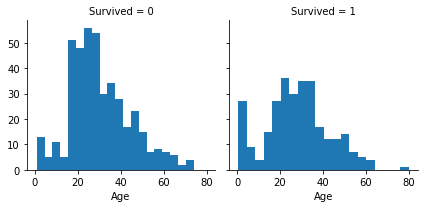

In [34]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


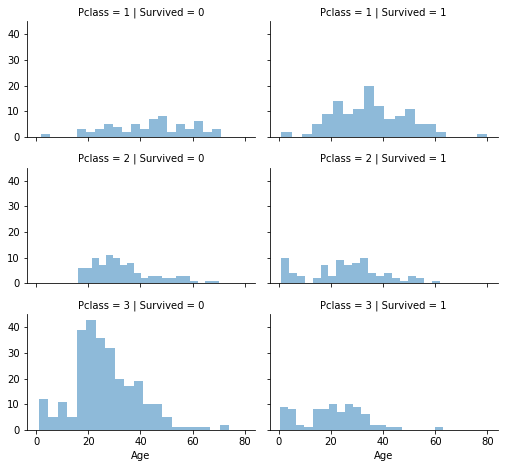

In [36]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


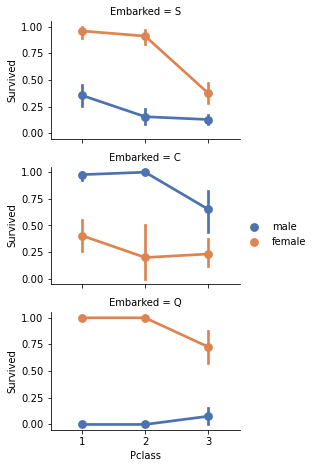

In [37]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

# Data cleaning 

In [55]:
# Let's drop columns 'Ticket' and 'Cabin'
train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]

In [56]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#### Converting a categorical feature

In [68]:
train_df["Sex"].replace({"male": "0", "female": "1"}, inplace=True)

In [69]:
test_df["Sex"].replace({"male": "0", "female": "1"}, inplace=True)

Now let's focus on age, we have a few methods to replace missing values:
1. Random number between mean and standard deviation
2. Using other features
3. Combined method.
##### let's choose the third variant, take a media for the values based on Pcalss and Parch and SibSp

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


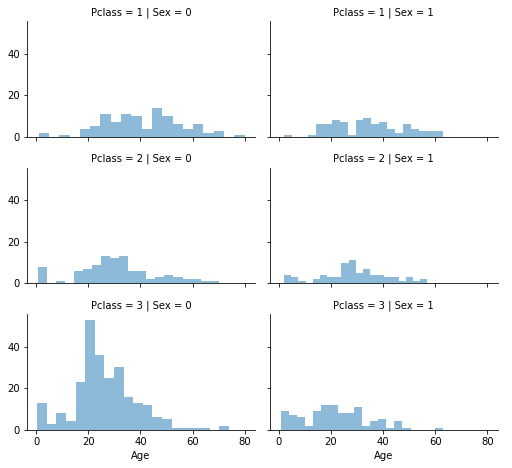

In [71]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [72]:
# create a empty array to contain guessed Age values based on Pclass x Gender combinations.
guess_ages = np.zeros((2,3))


In [87]:
mean_age = train_df.groupby(['Sex','Pclass'])['Age'].mean()
mean_age.reset_index(name = 'm_Age')

def fill_Ages(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Sex'],row['Pclass']]
    else:
        return row['Age']

train_df['Age'] = train_df.apply(fill_Ages, axis=1)

In [88]:
mean_age = test_df.groupby(['Sex','Pclass'])['Age'].mean()
mean_age.reset_index(name = 'm_Age')

test_df['Age'] = test_df.apply(fill_Ages, axis=1)

In [92]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [94]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

let's replace the missing Embarked for the train data to more frequency value 'S'

In [97]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')


Replace the missing Fare in test data to median

In [99]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

Now that will be good if I replace Embarked to int


In [102]:
train_df["Embarked"].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [103]:
test_df["Embarked"].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

# Model, prediction

In [106]:
# Drop prediction value from train dataset
X_train = train_df.drop("Survived", axis=1)
# Add prediction value to Y
Y_train = train_df["Survived"]
# Add test without PassengerID
X_test  = test_df.drop("PassengerId", axis=1).copy()


### Logistic Regression

In [108]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.03

In [109]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))

coeff_df.columns = ['Feature']

coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



,Feature,Correlation
1,Sex,2.576430
6,Embarked,0.206613
5,Fare,0.002200
2,Age,-0.043409
4,Parch,-0.071910
3,SibSp,-0.342855
0,Pclass,-1.180388


* A negative correlation means when we are increasing these values the predicted value decreasing. In our case when we increase Pclass, SibSp, Parch, Age we decrease the chance of surviving
* Most Feature which has an effect on the chance of surviving is Sex
* As we can see the Fare almost have no effect on the chance of surviving. 

### Support Vector Machines

In [111]:
svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

acc_svc

68.35

### KNN

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

83.95

Better to use n = 3, when we increase n > 3, accuracy decreases. 

### Gaussian Naive Bayes

In [119]:
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

79.24

### Perceptron

In [121]:
perceptron = Perceptron()

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

acc_perceptron

73.29

### Linear SVC

In [122]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


67.12

### Stochastic Gradient Descent

In [123]:
sgd = SGDClassifier()

sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

acc_sgd

77.78

### Decision Tree

In [124]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

98.2

* best acc

### Random Forest

In [128]:
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train, Y_train)

Y_pred_rd = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

98.2

In [127]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
1,KNN,83.95
2,Logistic Regression,81.03
4,Naive Bayes,79.24
6,Stochastic Gradient Decent,77.78
5,Perceptron,73.29
0,Support Vector Machines,68.35
7,Linear SVC,67.12


Based on the table, the best one is Random Forest and Decision Tree. So in this work, I will use a random forest model, because the datasets are small 

In [134]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rd
    })
submission.to_csv('submission.csv', index=False)